In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

load file

In [5]:
df=pd.read_csv("/content/sample_data/Breast_Cancer.csv")
df

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1


check for null values

In [6]:
df.isnull().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

fill the null values


In [7]:
column_name='Bare.nuclei'
df[column_name]=df[column_name].fillna(df[column_name].max())
df

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1


In [8]:
x=df.drop('Class',axis=1)
y=df['Class']
print(x)

          Id  Cl.thickness  Cell.size  Cell.shape  Marg.adhesion  \
0    1000025             5          1           1              1   
1    1002945             5          4           4              5   
2    1015425             3          1           1              1   
3    1016277             6          8           8              1   
4    1017023             4          1           1              3   
..       ...           ...        ...         ...            ...   
694   776715             3          1           1              1   
695   841769             2          1           1              1   
696   888820             5         10          10              3   
697   897471             4          8           6              4   
698   897471             4          8           8              5   

     Epith.c.size  Bare.nuclei  Bl.cromatin  Normal.nucleoli  Mitoses  
0               2          1.0            3                1        1  
1               7         10.0         

In [17]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 699, dtype: int64


Text(0, 0.5, 'frequency')

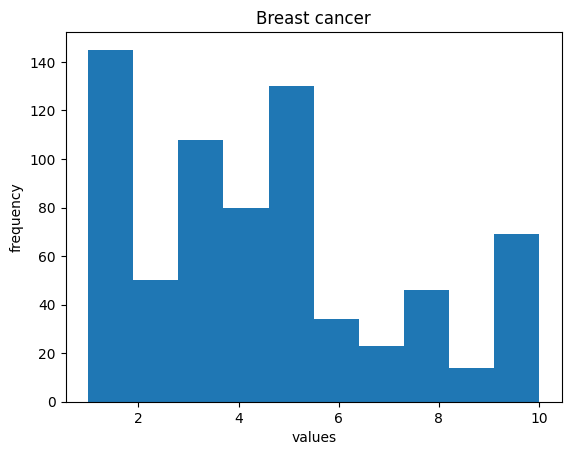

In [9]:
plt.hist(df['Cl.thickness'])
plt.title('Breast cancer')
plt.xlabel('values')
plt.ylabel('frequency')

In [37]:
#datasets into traning set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

In [38]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train= scaler.fit_transform(x_train)
print(x_train)
#print(x_test)


[[-1.08564892  2.02838346  0.2995061  ... -0.57777378  0.04124139
  -0.32425801]
 [ 0.13804167  1.66945141  2.25768045 ... -0.1599529   0.04124139
  -0.32425801]
 [-0.13312821 -1.20200501 -0.67958108 ... -0.99559467 -0.60816532
  -0.32425801]
 ...
 [ 0.38253213 -0.12520886 -0.67958108 ... -0.99559467 -0.60816532
  -0.32425801]
 [ 0.62721986  0.2337232  -0.67958108 ... -0.57777378 -0.60816532
  -0.32425801]
 [-1.4049915  -1.20200501 -0.67958108 ... -0.99559467 -0.60816532
  -0.32425801]]


In [39]:
#training KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
#predict
y_pred= classifier.predict(x_test)

In [41]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[83  2]
 [ 3 52]]


In [27]:
#accuracy
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9642857142857143

In [43]:
#StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [30]:
#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
#train Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(x_train_scaled, y_train)

LogisticRegression()

In [33]:
#Predict
y_pred_logreg = logreg_model.predict(x_test_scaled)

In [36]:
#confusion matrix
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print(confusion_matrix_logreg)

[[94  1]
 [ 4 41]]


In [44]:
#accuracy
kna= KNeighborsClassifier()
kna.fit(x_train, y_train)
kna.score(x_test, y_test)

0.9642857142857143